### This script file is used to analysis Smarket.csv dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

/Users/ruotwang/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
df = pd.read_csv('data/Weekly.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
Year         1089 non-null int64
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 76.6+ KB


<b>(a) Produce some numerical and graphical summaries of data. Do there appear to be any patterns?</b>

In [5]:
description = df.describe()
print(description)

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

This data frame with 1250 observations on the following 9 variables.

    Year: The year that the observation was recorded
    Lag1: Percentage return for previous day
    Lag2: Percentage return for 2 days previous
    Lag3: Percentage return for 3 days previous
    Lag4: Percentage return for 4 days previous
    Lag5: Percentage return for 5 days previous
    Volume: Volume of shares traded (number of daily shares traded in billions)
    Today: Percentage return for today
    Direction: A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day

In [6]:
df.shape

(1089, 9)

In [7]:
# Correlations
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


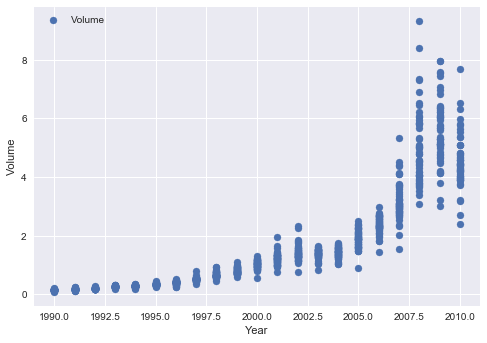

In [8]:
# plot Volume vs Year
figv, axv = plt.subplots()
axv.scatter(df['Year'], df['Volume'])
axv.set_xlabel('Year')
axv.set_ylabel('Volume')
axv.legend()
plt.show()

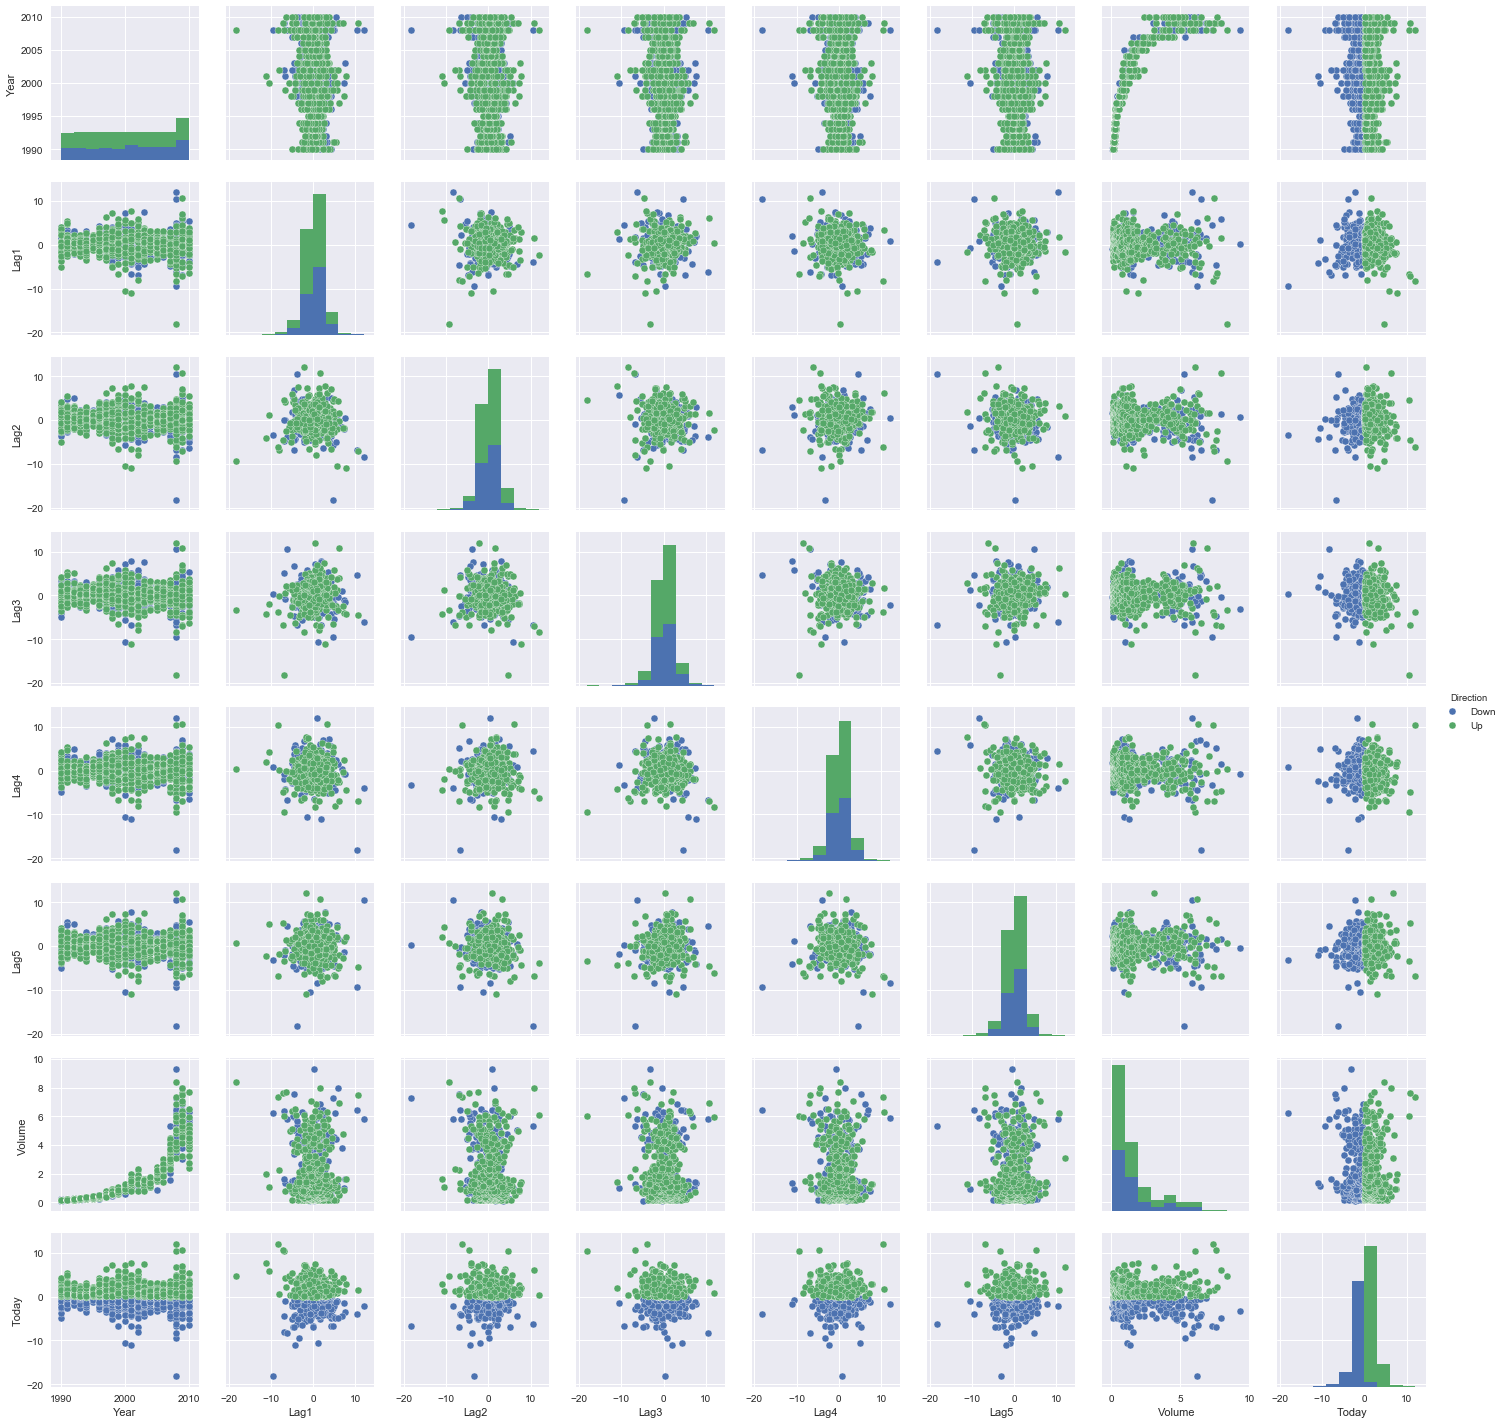

In [9]:
# Pair plot matrix
sns.set()
sns.pairplot(df, hue='Direction')
plt.show()

<b>(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?</b>

In [8]:
# Logistic regression with statsmodels
predictors = list(df.columns)
predictors.remove('Direction')
predictors.remove('Year')
predictors.remove('Today')
print(predictors)
lr_form = 'Direction~' + '+'.join(predictors)
logreg = smf.glm(formula=lr_form, data=df, family=sm.families.Binomial()).fit()

logreg.summary()

['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Tue, 31 Oct 2017   Deviance:                       1486.4
Time:                                          18:06:46   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2669      0.086     -3.106      0.002      -0.435      -0.098
Lag1           0.0413      0.026      1.563      0.118      -0.010       0.093
Lag2          -0.0584      0.027     -2.175      0.030      -0.111      -0.006
Lag3           0.0161      0.027      0.602      0.547      -0.036       0.068
Lag4           0.0278      0.026      1.050      0.294      -0.024       0.080
Lag5           0.0145      0.026      0.549      0.583      -0.037       0.066
Volume         0.0227      0.037      0.616      0.538      -0.050       0.095
==============================================================================
"""

Considering P-value, we can see only predictor "Lag2" is statistically significant as its p-value is less than 0.5. 

<b>(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.</b>

In [9]:
X_full = np.array(df[predictors])
Y_full = np.array(df['Direction'])
logit = LogisticRegression()
res_logit = logit.fit(X_full, Y_full)
Y_pred_full = res_logit.predict(X_full)

# Confusion matrix
confusion_matrix(Y_full, Y_pred_full)

array([[ 55, 429],
       [ 47, 558]])

In [10]:
# Accuracy, precision and recall
print("Accuracy full:", np.round(accuracy_score(Y_full, Y_pred_full), 3))
print("Precision full:", np.round(precision_score(Y_full, Y_pred_full, pos_label='Up'), 3))
print("Recall full:", np.round(recall_score(Y_full, Y_pred_full, pos_label='Up'), 3))

Accuracy full: 0.563
Precision full: 0.565
Recall full: 0.922


<b>(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).</b>

In [11]:
data_train = df[df['Year'] < 2009]
data_test = df[df['Year'] >= 2009]

X_train = np.array(data_train[['Lag2']])
Y_train = np.array(data_train['Direction'])

X_test = np.array(data_test[['Lag2']])
Y_test = np.array(data_test['Direction'])

logit_clf = LogisticRegression()
# Fit model. let X_train = matric of predictors, Y_train = matric of variables
res_logit_clf = logit_clf.fit(X_train, Y_train)

# Predict values fro training set
Y_pred = res_logit_clf.predict(X_test)

# Confusion matrix
confusion_matrix(Y_test, Y_pred)

array([[ 9, 34],
       [ 5, 56]])

In [12]:
# Accuracy, precision and recall
print("Accuracy logit:", np.round(accuracy_score(Y_test, Y_pred), 3))
print("Precision logit:", np.round(precision_score(Y_test, Y_pred, pos_label='Up'), 3))
print("Recall logit:", np.round(recall_score(Y_test, Y_pred, pos_label='Up'), 3))

Accuracy logit: 0.625
Precision logit: 0.622
Recall logit: 0.918


<b>(e) Use Forward Stepwise Selection approach for feature selection. In each step, choose the best model using the highest AUC. Report the features, confusion matrix, and AUC that appears to provide the best results on the held out data.</b>

In [13]:
predictors = list(df.columns)
predictors.remove('Direction')
predictors.remove('Year')
predictors.remove('Today')
print(predictors)

['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']


In [14]:
def caculate_accuracy(features):
    data_train = df[df['Year'] < 2009]
    data_test = df[df['Year'] >= 2009]
    
    X_train = np.array(data_train[features])
    Y_train = np.array(data_train['Direction'])
    
    X_test = np.array(data_test[features])
    Y_test = np.array(data_test['Direction'])
    
    logit_clf = LogisticRegression()
    res_logit_clf = logit_clf.fit(X_train, Y_train)
    
    Y_pred = res_logit_clf.predict(X_test)
    
    # Convert original numpy array into binary representation
    Y_test[Y_test == 'Up'] = 1
    Y_test[Y_test == 'Down'] = 0
    Y_pred[Y_pred == 'Up'] = 1
    Y_pred[Y_pred == 'Down'] = 0
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    
    return auc(false_positive_rate, true_positive_rate)

In [15]:
# first round iteration
for p in predictors:
    auc_res = caculate_accuracy([p])
    print([p], auc_res)

['Lag1'] 0.497331300038
['Lag2'] 0.563667556233
['Lag3'] 0.5
['Lag4'] 0.5
['Lag5'] 0.475409836066
['Volume'] 0.491612657263


Pick the highest value => Lag2

In [16]:
predictors.remove('Lag2')

In [17]:
# second round iteration
for p in predictors:
    pred_sec = ['Lag2']
    pred_sec.append(p)
    auc_res = caculate_accuracy(pred_sec)
    print(pred_sec, auc_res)

['Lag2', 'Lag1'] 0.515821578345
['Lag2', 'Lag3'] 0.560236370568
['Lag2', 'Lag4'] 0.560236370568
['Lag2', 'Lag5'] 0.54041174228
['Lag2', 'Volume'] 0.527640106748


We can see if we add one more feature, AUC value will always decrease, that means a sigle feature "Lag2" is the best feature to predict.